<h1>Neural Networks in number recognition</h1>
![](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

In [36]:
import pandas as pd
import numpy as np
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils import to_categorical 

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
np.random.seed(0)
sns.set(rc={'figure.figsize':(10,5)})



In [38]:
# Load the training data
dataset = pd.read_csv("data/train.csv")

#Load the test data for the competition submission
competition_dataset = pd.read_csv("data/test.csv")

In [39]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print('Nbr data:',len(dataset))
print('Nbr Labels:',set(dataset['label'].unique()))
print('Each label has ',len(dataset.columns)-1,' pixels')

Nbr data: 42000
Nbr Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Each label has  784  pixels


In [41]:
# The label is the digit we are trying to predict
label = dataset["label"]

# We keep only the features = the different 28 x 28 pixels
# dropping the first column
feature = dataset.drop(labels = ["label"],axis = 1)

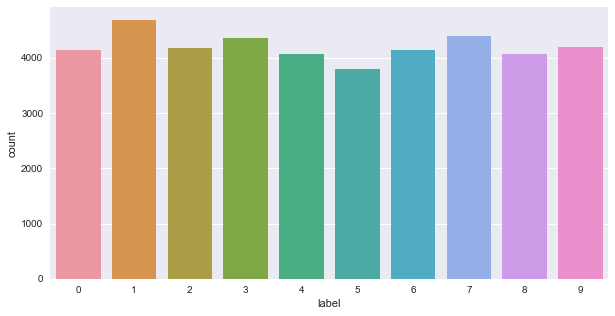

In [42]:
# We can now check if we have enought 
g = sns.countplot(label)

In [43]:
# Show a random example
example = np.random.choice(feature.index)
print(example)
print(label[example])

2732
9


In [44]:
pd.DataFrame(feature.loc[example].values.reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,164,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,85,247,...,0,0,0,0,0,0,0,0,0,0


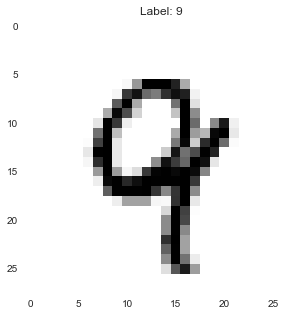

In [45]:
fig, ax = plt.subplots()
ax.imshow(feature.loc[example].values.reshape(28, 28), cmap='gray_r')
ax.set_title("Label: %i" % label[example])
ax.grid(False)

In [46]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
digits = label
label = to_categorical(label, num_classes = 10)

In [47]:
# inspect how the labels were encode into categories
pd.concat([pd.DataFrame(dataset["label"]),pd.DataFrame(label)],axis=1).head()

,label,0,1,2,3,4,5,6,7,8,9
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Normalize between 0 and 1 the data for both training and competition dataset (The pixel-value is an integer between 0 and 255)
feature = feature / 255.0
competition_dataset = competition_dataset / 255.0

<h3>Dense Neural Network</h3>

In [49]:
# Split the dataset into train and validation set
# Keep 10% for the validation and 90% for the training
# Stratify is argument to keep trainingset evenly balanced ofver the labels (eg validation set not only the digit 5)

feature_train, feature_val, label_train, label_val = train_test_split(feature, label, test_size = 0.1, stratify=label)

In [50]:
print('Nbr training samples:',len(feature_train), 'nbr test samples:',len(feature_val))

Nbr training samples: 37800 nbr test samples: 4200


In [51]:
# Create Dense Neural network with 5layers
model_1 = Sequential()
model_1.add(Dense(200, activation = "relu", input_shape = (784,)))
model_1.add(Dense(100, activation = "relu"))
model_1.add(Dense(60, activation = "relu"))
model_1.add(Dense(30, activation = "relu"))
model_1.add(Dense(10, activation = "softmax"))

In [53]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Define the optimizer and compile the model
# Using a learning rate of 0.03
optimizer = optimizers.SGD(lr=0.03)

<b>Cross-entropy loss</b>, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.<br>
<br>
A <b>metric</b> is a function that is used to judge the performance of your model. Metric functions are to be supplied in the  metrics parameter when a model is compiled.

In [55]:
model_1.compile(optimizer= optimizer , loss = "categorical_crossentropy", metrics=["acc"])

In [56]:
# With this model you should be able to achieve around 95.5% accuracy
# change epochs to 8 to have a full run

history = model_1.fit(feature_train, label_train, batch_size = 100, epochs = 5, 
          validation_data = (feature_val, label_val), verbose = 1)


Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 2s 58us/step - loss: 0.9392 - acc: 0.7192 - val_loss: 0.3842 - val_acc: 0.8907
Epoch 2/5
37800/37800 [==============================] - 2s 53us/step - loss: 0.3073 - acc: 0.9087 - val_loss: 0.2657 - val_acc: 0.9229
Epoch 3/5
37800/37800 [==============================] - 2s 52us/step - loss: 0.2278 - acc: 0.9329 - val_loss: 0.2151 - val_acc: 0.9369
Epoch 4/5
37800/37800 [==============================] - 2s 53us/step - loss: 0.1838 - acc: 0.9450 - val_loss: 0.1823 - val_acc: 0.9498
Epoch 5/5
37800/37800 [==============================] - 2s 53us/step - loss: 0.1534 - acc: 0.9544 - val_loss: 0.1543 - val_acc: 0.9586


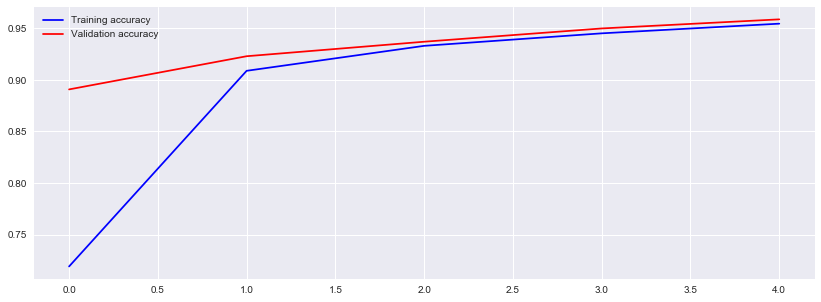

In [57]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(1,1,figsize=(14,5))
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True);

In [58]:
# inspect the result
classes_predicted = model_1.predict_classes(feature_val)

In [59]:
classes_test = np.argmax(label_val, axis=1, out=None)

In [60]:
df = pd.concat([pd.DataFrame(classes_predicted),pd.DataFrame(classes_test)],axis=1)
df.columns = ['predicted','test']
df.head()

,predicted,test
0,9,9
1,9,9
2,3,3
3,3,3
4,3,3


In [61]:
# study an example where it is different
idx = df['predicted']!=df['test']
print('Nbr errors:',sum(idx), 'on ',len(classes_test),' test samples')
i = df.loc[idx,:].index[0]
print('Take test example',i)

Nbr errors: 174 on  4200  test samples
Take test example 24


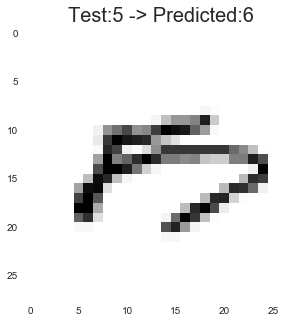

In [62]:
fig, ax = plt.subplots()
ax.imshow(feature_val.values[i,:].reshape(28, 28), cmap='gray_r')
ax.set_title('Test:' + str(df['test'].values[i])
             + ' -> Predicted:' +str(df['predicted'].values[i]),size=20)
ax.grid(False)